<a href="https://colab.research.google.com/github/eshaan90/image-classification/blob/master/multiclass_image_classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import Sequential,layers,optimizers
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
    x_train=x_train.reshape((60000,28,28,1))
    x_train=x_train.astype('float32')/255
    
    x_test=x_test.reshape((10000,28,28,1))
    x_test=x_test.astype('float32')/255

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


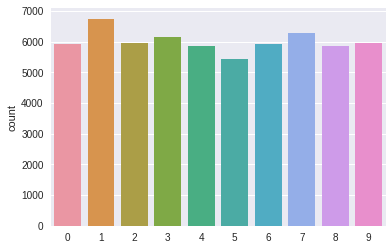

In [4]:
sns.countplot(y_train)

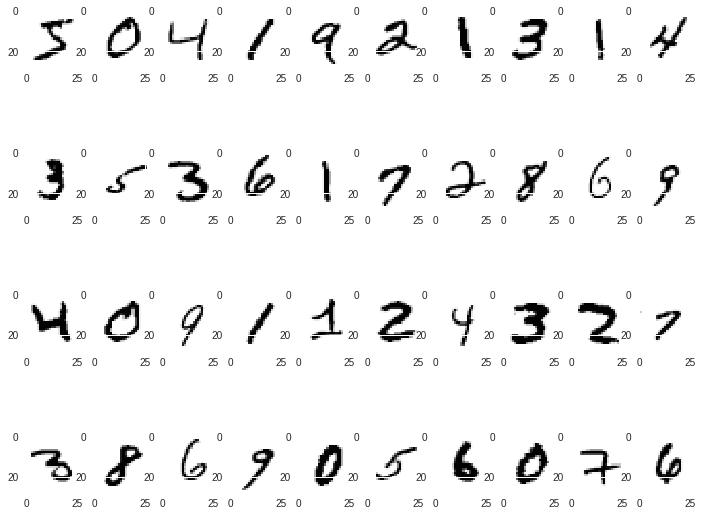

In [5]:
# preview the images first
plt.figure(figsize=(12,10))
x, y = 10, 4
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i].reshape((28,28)),interpolation='nearest')
plt.show()

In [0]:
batch_size = 64
num_classes = 10
epochs = 20
alpha=0.001
input_shape = (28,28,1)
activation='relu'

In [7]:
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test,num_classes)
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [0]:
from sklearn.model_selection import train_test_split 
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state=42)

In [9]:
model = Sequential()
model.add(layers.Conv2D(32,(3,3),activation=activation,input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation=activation))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation=activation))
model.add(layers.Dense(10,activation='softmax'))
#model.add(Flatten())
#model.add(Dense(128, activation='relu'))
#model.add(BatchNormalization())
#model.add(Dropout(0.25))
#model.add(Dense(num_classes, activation='softmax'))


Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total para

In [11]:
model.layers[2].get_config()

{'activation': 'relu',
 'activity_regularizer': None,
 'bias_constraint': None,
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'bias_regularizer': None,
 'data_format': 'channels_last',
 'dilation_rate': (1, 1),
 'filters': 64,
 'kernel_constraint': None,
 'kernel_initializer': {'class_name': 'VarianceScaling',
  'config': {'distribution': 'uniform',
   'mode': 'fan_avg',
   'scale': 1.0,
   'seed': None}},
 'kernel_regularizer': None,
 'kernel_size': (3, 3),
 'name': 'conv2d_2',
 'padding': 'valid',
 'strides': (1, 1),
 'trainable': True,
 'use_bias': True}

In [12]:
model.count_params()

121930

In [13]:
x_train.shape

(54000, 28, 28, 1)

In [0]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=15, # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

In [0]:
from keras.callbacks import ReduceLROnPlateau
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=alpha),
              metrics=['accuracy'])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001)

In [16]:
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size), 
                        epochs = epochs, validation_data=(x_val, y_val),
                        verbose = 1, steps_per_epoch=x_train.shape[0]/32,
                        callbacks=[learning_rate_reduction])

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
1688/1687 [==============================] - 126s 75ms/step - loss: 0.2636 - acc: 0.9175 - val_loss: 0.0553 - val_acc: 0.9833
Epoch 2/20
1688/1687 [==============================] - 125s 74ms/step - loss: 0.0894 - acc: 0.9728 - val_loss: 0.0502 - val_acc: 0.9843
Epoch 3/20
1688/1687 [==============================] - 125s 74ms/step - loss: 0.0651 - acc: 0.9794 - val_loss: 0.0296 - val_acc: 0.9918
Epoch 4/20
1688/1687 [==============================] - 125s 74ms/step - loss: 0.0553 - acc: 0.9832 - val_loss: 0.0314 - val_acc: 0.9903
Epoch 5/20
1688/1687 [==============================] - 123s 73ms/step - loss: 0.0502 - acc: 0.9844 - val_loss: 0.0279 - val_acc: 0.9930
Epoch 6/20
1688/1687 [==============================] - 123s 73ms/step - loss: 0.0448 - acc: 0.9868 - val_loss: 0.0353 - val_acc: 0.9913
Epoch 7/20
1688/1687 [==============================] - 123s 73ms/step - loss: 0.0429 - acc: 0.9872 - val_loss: 0.0290 - val_acc: 

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


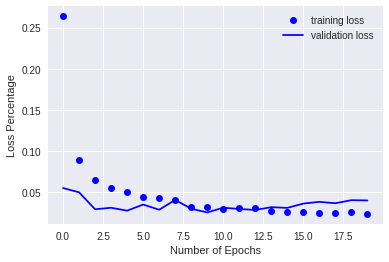

In [19]:
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(epochs)
plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.legend()
plt.xlabel('Number of Epochs')
plt.ylabel('Loss Percentage')
plt.grid('on')

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


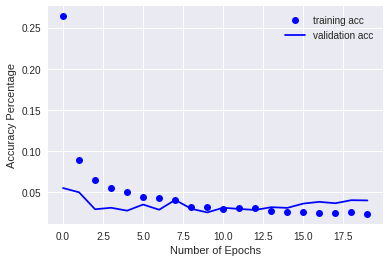

In [20]:
acc=history.history['acc']
val_acc=history.history['val_acc']

plt.plot(epochs, loss, 'bo', label='training acc')
plt.plot(epochs, val_loss, 'b', label='validation acc')
plt.legend()
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy Percentage')
plt.grid('on')

In [0]:
model.save('mnist_model_1.h5')
json_string = model.to_json()